(Vanishing_Gradient_2)=
# Chapter 14 -- Vanishing Gradient 2
[<!-- module-dsml badge --><span class="module module-dsml">Data Science and Machine Learning for Geoscientists</span>](module-dsml) 


This section is a more detailed discussion of what caused the vanishing gradient. For beginners, just skip this bit and go to the next section, the Regularisation. I originally put this section at the very end of the study notes, but I feel like for a better consistency and structure, it is better to put it here. Readers should be heading back to this section after finishing the `Specific Recommendations' section.

Anyway, let's go back to vanishing gradient. In the commonly used MNIST example, if we're doing visual pattern recognition, then the neurons in the first layer might learn to recognize edges, the neurons in the second layer could learn to recognize more complex shapes, say triangle or rectangles, built up from edges. The third layer would then recognize still more complex shapes. And so on. These multiple layers of abstraction seem likely to give deep networks a compelling advantage in learning to solve complex pattern recognition problems. Moreover, there are theoretical results suggesting that deep networks are intrinsically more powerful than shallow networks.

How can we train such deep networks? We can train deep networks using our workhorse learning algorithm - stochastic gradient descent by backpropagation. But we'll run into trouble, with our deep networks not performing much (if at all) better than shallow networks.

When we look closely, we'll discover that the different layers in our deep network are learning at vastly different speeds. In particular, when later layers in the network are learning well, early layers often get stuck during training, learning almost nothing at all. This stuckness isn't simply due to bad luck. Rather, there are fundamental reasons the learning slowdown occurs, connected to our use of gradient-based learning techniques.

As we delve into the problem more deeply, we'll learn that the opposite phenomenon can also occur: the early layers may be learning well, but later layers can become stuck. In fact, we'll find that there's an intrinsic instability associated to learning by gradient descent in deep, many-layer neural networks. This instability tends to result in either the early or the later layers getting stuck during training.

This is because of the vanishing gradient. To get insight into why the vanishing gradient problem occurs, let's consider the simplest deep neural network: one with just a single neuron in each layer, as we discussed before in figure 1.14 in chapter General Back Propagation.

Recall the gradient of $w_1$ in the input layer, $\frac{\delta C}{\delta w_1}$ can be expressed by the equation 12 in chapter General Back Propagation we derived earlier. Excepting the very last term ($\frac{\delta C}{\delta \boldsymbol{y}}$), this expression is a product of terms of the form $w_j\sigma^{'}(h_j)$. To understand how each of those terms behave, let's look at a plot of the function $\sigma^{'}(h_j)$:

In [5]:
# make the figure be plotted at the centre
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

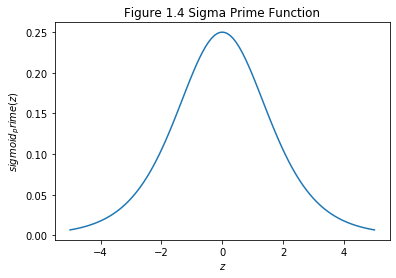

In [2]:
import numpy as np
import matplotlib.pyplot as plt
N  = 100

def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

def main():
    z = np.linspace(-5, 5, N)
    
    sigmoid_prime = sigmoid(z)*(1-sigmoid(z))

    plt.figure()
    plt.plot(z, sigmoid_prime)
    plt.xlabel('$z$')
    plt.ylabel('$sigmoid_prime(z)$')
    plt.title('Figure 1.4 Sigma Prime Function')
    
    plt.show()

if __name__ == '__main__':
    main()

The derivative reaches a maximum at $\sigma^{'}(0)=1/4$. Now, if we use our standard approach to initializing the weights in the network, then we'll choose the weights using a Gaussian with mean 0 and standard deviation 1. So the weights will usually satisfy $|w_j|<1$. Putting these observations together, we see that the terms $w_j\sigma^{'}(h_j)$ will usually satisfy $|w_j\sigma^{'}(h_j)|<1/4$. And when we take a product of many such terms, the product will tend to exponentially decrease: the more terms, the smaller the product will be. This is starting to smell like a possible explanation for the vanishing gradient problem.

Of course, this is an informal argument, not a rigorous proof that the vanishing gradient problem will occur. There are several possible escape clauses. In particular, we might wonder whether the weights $w_j$ could grow during training. If they do, it's possible the terms $w_j\sigma^{'}(h_j)$ in the product will no longer satisfy $|w_j\sigma^{'}(h_j)|<1/4$. Indeed, if the terms get large enough - greater than 1 - then we will no longer have a vanishing gradient problem. Instead, the gradient will actually grow exponentially as we move backward through the layers. Instead of a vanishing gradient problem, we'll have an exploding gradient problem.

However, the fundamental problem here isn't so much the vanishing gradient problem or the exploding gradient problem. It's that the gradient in early layers is the product of terms from all the later layers. When there are many layers, that's an intrinsically unstable situation. The only way all layers can learn at close to the same speed is if all those products of terms come close to balancing out. Without some mechanism or underlying reason for that balancing to occur, it's highly unlikely to happen simply by chance. In short, the real problem here is that neural networks suffer from an unstable gradient problem. As a result, if we use standard gradient-based learning techniques, different layers in the network will tend to learn at wildly different speeds.
